## Measuring bias
<br>
Fairness analysis of adult income dataset.
<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
pip install ucimlrepo

In [3]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.1 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
#print(adult.metadata)

# variable information
# print(adult.variables)
# data = pd.DataFrame(adult.variables)
# data
X['income']= y.values



,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [24]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import plot_importance

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

import shap


In [25]:


df = X.dropna()

print(len(df))

df.head()

47621


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Exploratory analysis

## Unbalanced datasets

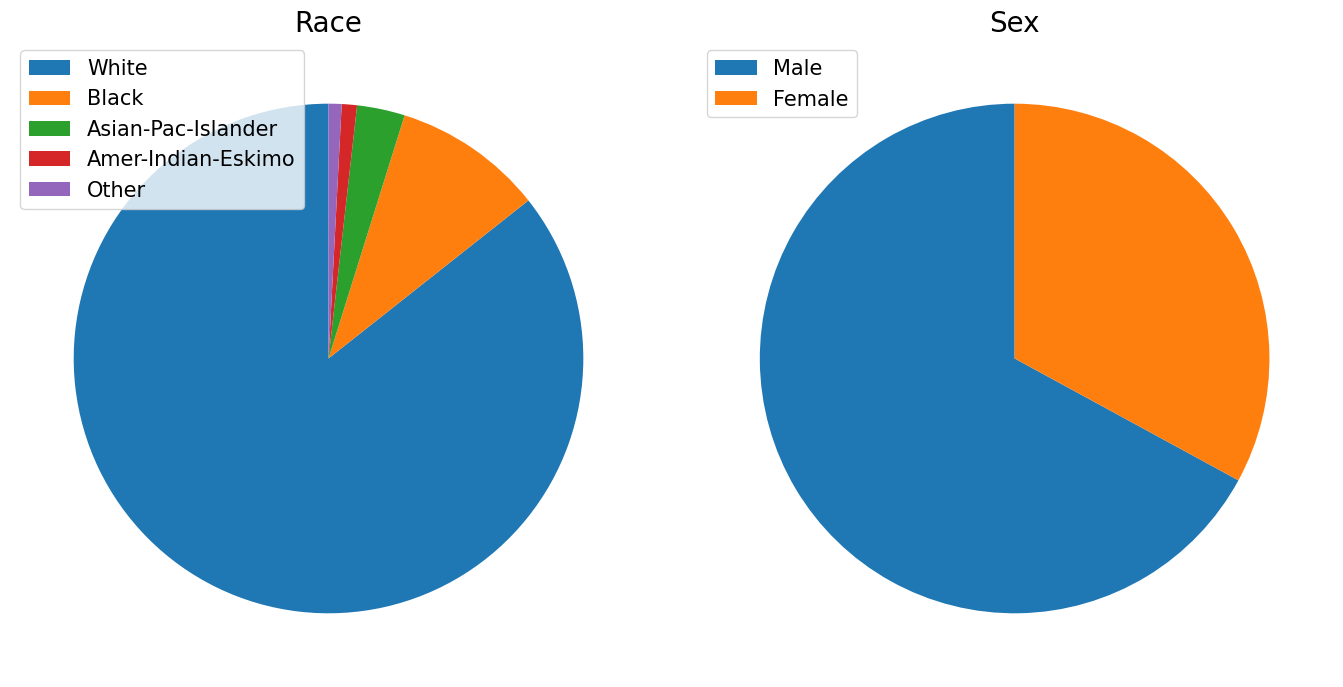

In [30]:
plt.figure(figsize=(14, 7))
plt.subplot(121)

#Plot breakdown by race
counts = df['race'].value_counts()
labels = counts.index

plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Race",size=20)

plt.subplot(122)

#Plot breakdown by sex
counts = df['sex'].value_counts()
labels = counts.index

plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Sex",size=20)


plt.tight_layout(pad=2)
#plt.savefig(path.format('unbalnced_datsets.png'),format='png',dpi=150)

## Defining protected features

In [32]:
df_fair = df[['race','sex']]

#Define protected variables
df_fair['priv_race'] = [1 if r=='White' else 0 for r in df_fair['race']]
df_fair['priv_sex'] = [1 if s=='Male' else 0 for s in df_fair['sex']]

#Define target variable
df_fair['income'] =  [1 if y == '>50K'else 0 for y in df['income']]

df_fair.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,race,sex,priv_race,priv_sex,income
0,White,Male,1,1,0
1,White,Male,1,1,0
2,White,Male,1,1,0
3,Black,Male,0,1,0
4,Black,Female,0,0,0


## Prevelance

In [35]:
#Calculate prevelance
prev = df_fair['income'].mean()
prev_race = df_fair.groupby('priv_race')['income'].mean()
prev_sex = df_fair.groupby('priv_sex')['income'].mean()
prev_comb = df_fair.groupby(['priv_race','priv_sex'])['income'].mean()

print(prev)
print(prev_race)
print(prev_sex)
print(prev_comb)

0.1646542491757838
priv_race
0    0.105925
1    0.174496
Name: income, dtype: float64
priv_sex
0    0.075172
1    0.208598
Name: income, dtype: float64
priv_race  priv_sex
0          0           0.049443
           1           0.151547
1          0           0.081394
           1           0.216259
Name: income, dtype: float64


## Proxy Variable

In [39]:
# Check if 'occupation' is in df
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [50]:
print("Unique occupations:", df['occupation'].unique())
print("Occupation groups:", occ_groups.keys())


Unique occupations: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Occupation groups: dict_keys(['Priv-house-serv', 'Other-service', 'Handlers-cleaners', 'Farming-fishing', 'Machine-op-inspct', 'Adm-clerical', 'Transport-moving', 'Craft-repair', 'Sales', 'Armed-Forces', 'Tech-support', 'Protective-serv', 'Prof-specialty', 'Exec-managerial'])


In [70]:
#Target variable
y = [1 if y == '>50K' else 0 for y in df['income']]

#Model features
X = df[['age','education-num','hours-per-week']]
X['marital-status'] = [1 if x=='Married-civ-spouse' else 0 for x in df['marital-status']]
X['native-country'] = [1 if x=='United-States' else 0 for x in df['native-country']]

occ_groups = {
    'Priv-house-serv':0,'Other-service':0,'Handlers-cleaners':0,
    'Farming-fishing':1,'Machine-op-inspct':1,'Adm-clerical':1,
    'Transport-moving':2,'Craft-repair':2,'Sales':2,
    'Armed-Forces':3,'Tech-support':3,'Protective-serv':3,
    'Prof-specialty':4,'Exec-managerial':4}

X.loc[:, 'occupation'] = [occ_groups[x] if x in occ_groups else 0 for x in df['occupation']]

#X['occupation'] = [occ_groups[x] for x in df['occupation']]

X.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,age,education-num,hours-per-week,marital-status,native-country,occupation
0,39,13,40,0,1,1
1,50,13,13,1,1,4
2,38,9,40,0,1,0
3,53,7,40,1,1,0
4,28,13,40,1,0,4


In [71]:
X.isna().sum()


age               0
education-num     0
hours-per-week    0
marital-status    0
native-country    0
occupation        0
dtype: int64

([<matplotlib.axis.XTick at 0x7973a0f15540>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'education-num'),
  Text(2, 0, 'hours-per-week'),
  Text(3, 0, 'marital-status'),
  Text(4, 0, 'native-country'),
  Text(5, 0, 'occupation')])

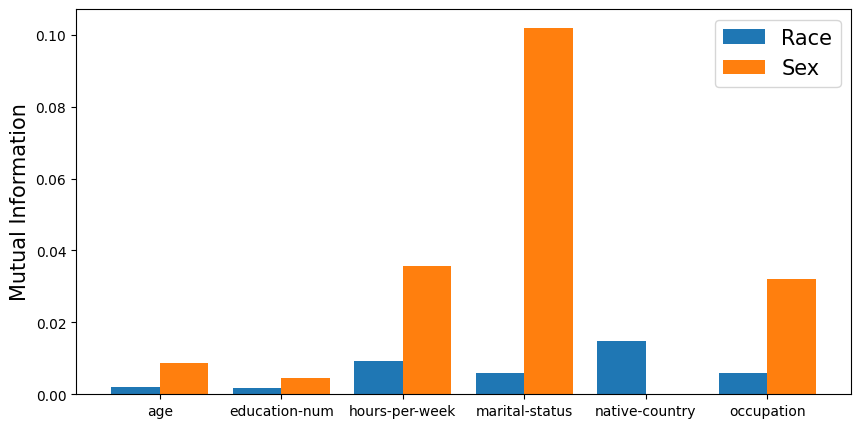

In [72]:
#Mutual information

#Calcualte mutual information
mut_race = mutual_info_classif(X,df_fair['priv_race'],discrete_features=[1,3,4,5])
mut_sex = mutual_info_classif(X,df_fair['priv_sex'],discrete_features=[1,3,4,5])


#Plot mutual information
plt.figure(figsize=(10, 5))

labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
       'native-country', 'occupation']
x = np.arange(len(labels))
width = 0.4
plt.bar(x-width/2,height= mut_race,width=width,label='Race')
plt.bar(x+width/2,height= mut_sex,width=width,label='Sex')
plt.legend(fontsize=15)

plt.ylabel('Mutual Information',size=15)
plt.xticks(ticks=x,labels=labels)




In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# Assuming df_fair and X are your original DataFrames

# Get balanced sample
y_race_0 = df_fair[df_fair['priv_race'] == 0]['priv_race']
y_race_1 = df_fair[df_fair['priv_race'] == 1]['priv_race']
y_race_1 = y_race_1.sample(len(y_race_0))
y_race = pd.concat([y_race_0, y_race_1])

X_race = X.loc[y_race.index].copy()

# Convert 'occupation' column to str type
X_race.loc[:, 'occupation'] = X_race['occupation'].astype(str)

# Initialize a label encoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform 'occupation' column
X_race.loc[:, 'occupation'] = label_encoder.fit_transform(X_race['occupation'])

# Train model and get predictions
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X_race, y_race)
y_pred = model.predict(X_race)

# Calculate accuracy
acc_race = accuracy_score(y_race, y_pred)

# Get feature importance
fi_race = model.get_booster().get_score(importance_type='weight')

# Output results
print(acc_race)
print(confusion_matrix(y_race, y_pred))
print(classification_report(y_race, y_pred))


0.7343087051938552
[[5064 1771]
 [1861 4974]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      6835
           1       0.74      0.73      0.73      6835

    accuracy                           0.73     13670
   macro avg       0.73      0.73      0.73     13670
weighted avg       0.73      0.73      0.73     13670



In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [74]:
#Feature importance sex

# Get balanced sample
y_sex_0 = df_fair[df_fair['priv_sex'] == 0]['priv_sex']
y_sex_1 = df_fair[df_fair['priv_sex'] == 1]['priv_sex']
y_sex_1 = y_sex_1.sample(len(y_sex_0))
y_sex = y_sex_0.append(y_sex_1)

X_sex = X.loc[y_sex.index]

#Train model and get predictions
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X_sex, y_sex)

y_pred = model.predict(X_sex)

#Calculate accuracy
acc_sex = accuracy_score(y_sex, y_pred)

#Get feature importance
fi_sex = model.get_booster().get_score(importance_type='weight')

#Output results
print(acc_sex)
print(confusion_matrix(y_sex, y_pred))
print(classification_report(y_sex, y_pred))

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


0.7865021678143331
[[13221  2463]
 [ 4234 11450]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80     15684
           1       0.82      0.73      0.77     15684

    accuracy                           0.79     31368
   macro avg       0.79      0.79      0.79     31368
weighted avg       0.79      0.79      0.79     31368



([<matplotlib.axis.XTick at 0x7973a0f488e0>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'education-num'),
  Text(2, 0, 'hours-per-week'),
  Text(3, 0, 'marital-status'),
  Text(4, 0, 'native-country'),
  Text(5, 0, 'occupation')])

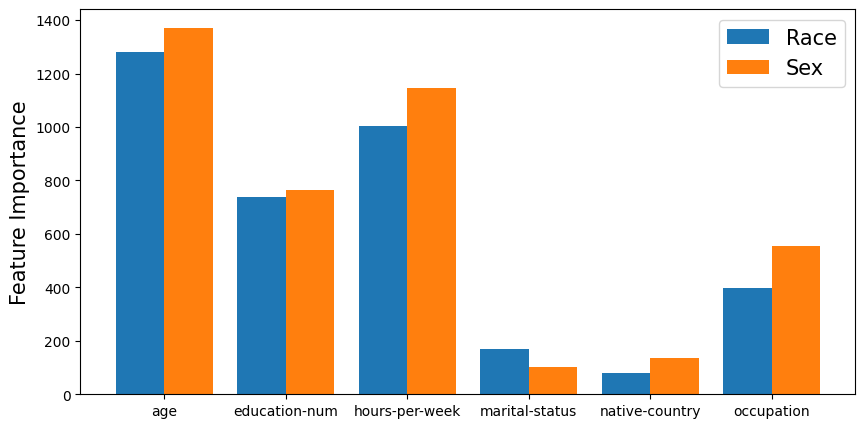

In [75]:
#Plot feature importance
plt.figure(figsize=(10, 5))

labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
       'native-country', 'occupation']

fi_race = [fi_race[l] for l in labels]
fi_sex = [fi_sex[l] for l in labels]


x = np.arange(len(labels))
width = 0.4
plt.bar(x-width/2,height= fi_race,width=width,label='Race')
plt.bar(x+width/2,height= fi_sex,width=width,label='Sex')
plt.legend(fontsize=15)

plt.ylabel('Feature Importance',size=15)
plt.xticks(ticks=x,labels=labels)



# Measuring fairness

## Modelling

In [79]:
#Train model
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)
df_fair['y_income'] = y_pred

print(confusion_matrix(y, y_pred))
print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[[38264  1516]
 [ 5325  2516]]
0.8563448898595157
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     39780
           1       0.62      0.32      0.42      7841

    accuracy                           0.86     47621
   macro avg       0.75      0.64      0.67     47621
weighted avg       0.84      0.86      0.84     47621



# Feasures of Fairness

In [80]:
def fairness_metrics(df):
    """Calculate fairness for subgroup of population"""

    #Confusion Matrix
    cm=confusion_matrix(df['income'],df['y_income'])
    TN, FP, FN, TP = cm.ravel()

    N = TP+FP+FN+TN

    # Overall accuracy
    ACC = (TP+TN)/N

    # True positive rate
    TPR = TP/(TP+FN)

    # False positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    # Percentage predicted as positive
    PPP = (TP + FP)/N

    return np.array([ACC, TPR, FPR, FNR, PPP])


In [81]:
#Calculate fairness metrics for race
fm_race_1 = fairness_metrics(df_fair[df_fair.priv_race==1])
fm_race_0 = fairness_metrics(df_fair[df_fair.priv_race==0])

#Get ratio of fairness metrics
fm_race = fm_race_0/fm_race_1

print(fm_race_1)
print(fm_race_0)
print(fm_race)

[0.84837935 0.32246733 0.04045264 0.67753267 0.08966312]
[0.9038771  0.30524862 0.02520046 0.69475138 0.05486467]
[1.06541621 0.94660323 0.62296199 1.02541385 0.61189782]


In [82]:
#Calculate fairness metrics for sex
fm_sex_1 = fairness_metrics(df_fair[df_fair.priv_sex==1])
fm_sex_0 = fairness_metrics(df_fair[df_fair.priv_sex==0])


#Get ratio of fairness metrics
fm_sex = fm_sex_0/fm_sex_1

print(fm_sex_1)
print(fm_sex_0)
print(fm_sex)

[0.81914394 0.34103873 0.0548368  0.65896127 0.114538  ]
[0.9320964  0.20695505 0.00896243 0.79304495 0.02384596]
[1.13789086 0.60683738 0.16343819 1.20347733 0.20819255]


# Additional analysis

In [84]:
df_fair['marital-status'] = X['marital-status']

#Calculate figures
count_ms = df_fair.groupby(['priv_sex','marital-status'])['priv_sex'].count()
prev_ms = df_fair.groupby(['marital-status'])['income'].mean()
prev_sex = df_fair.groupby(['priv_sex'])['income'].mean()

print(count_ms)
print(prev_ms)
print(prev_sex)

priv_sex  marital-status
0         0                 13294
          1                  2390
1         0                 12361
          1                 19576
Name: priv_sex, dtype: int64
marital-status
0    0.044787
1    0.304653
Name: income, dtype: float64
priv_sex
0    0.075172
1    0.208598
Name: income, dtype: float64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Archive

In [85]:
import numpy as np
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
r = np.random.gamma(3, 0.5, 1000)
r = (r-min(r))/(max(r)-min(r))
r = 16 + 60*r

nr = np.random.gamma(5, 1, 5000)
nr = (nr-min(nr))/(max(nr)-min(nr))
nr = 18 + 62*nr

In [86]:
avg_r = np.mean(r)
avg_nr = np.mean(nr)
avg_t = np.mean([*r,*nr])
print(avg_t,avg_nr,avg_r)

33.49067895705082 33.98163210948703 31.035913194869806


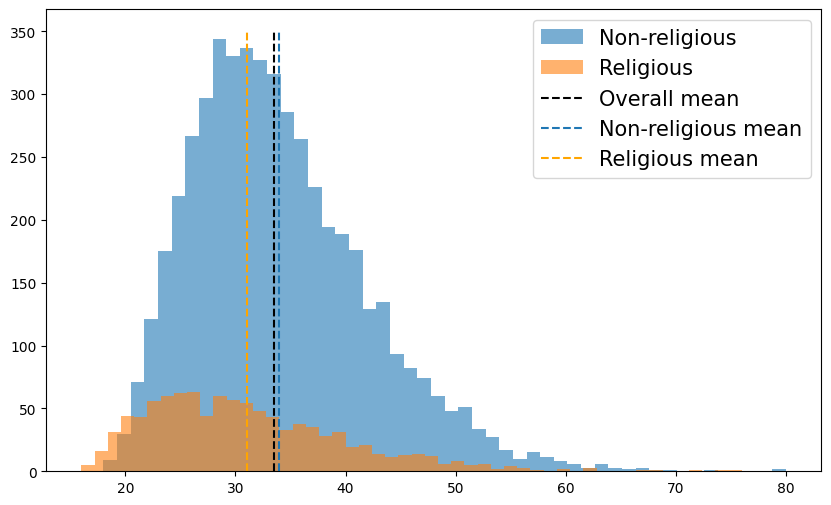

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(nr, 50,label='Non-religious',alpha = 0.6)
plt.hist(r, 50,label='Religious',alpha = 0.6)

plt.vlines(x=avg_t,ymin=0,ymax=350,colors='Black',linestyles='--', label= 'Overall mean')
plt.vlines(x=avg_nr,ymin=0,ymax=350,colors='#1F77B4',linestyles='--', label= 'Non-religious mean')
plt.vlines(x=avg_r,ymin=0,ymax=350,colors='Orange',linestyles='--', label= 'Religious mean')

plt.legend(prop={'size': 15})
